# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 17.09.2019

Мягкий дедлайн: 23:59MSK 29.09.2019 (за каждый день просрочки снимается 2 балла)

Жесткий дедлайн: 23:59MSK 02.10.2019

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а также привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

<strong style="color: red">Внимание!</strong> В этом ноутбуке используется библиотека `ipyleaflet`. Чтобы ее установить так, чтобы она работала, нужно совершить 2 простых шага:

In [1]:
# %%bash
# pip3 install ipyleaflet
# jupyter nbextension enable --py --sys-prefix ipyleaflet

После этого перезапустите сессию (не `Restart Kernel`, а нажмите `Ctrl+C` в терминале, где вы запускали ноутбук, и запустите заново). Лучше это сделать сразу, чтобы потом не пришлось прерывать сессию и терять промежуточные результаты работы. Если все сделано правильно, вы должны увидеть карту Москвы, выполнив ячейку ниже:

In [1]:
from ipyleaflet import Map, basemaps
Map(center=(55.7522200, 37.6155600), zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
data = pd.read_csv("/home/michael/programming/Python/ml-course-hse/nyc-taxi-trip-duration/train.csv")

In [4]:
# data.head()

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
import datetime

In [9]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = data.drop(columns=['dropoff_datetime']).copy()
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
type(data.iloc[0, 2])
# data.head()

pandas._libs.tslibs.timestamps.Timestamp

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Разбейте выборку на обучающую и тестовую в отношении 7:3.

In [10]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

y = data["trip_duration"]
X = data.drop(columns=["trip_duration"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

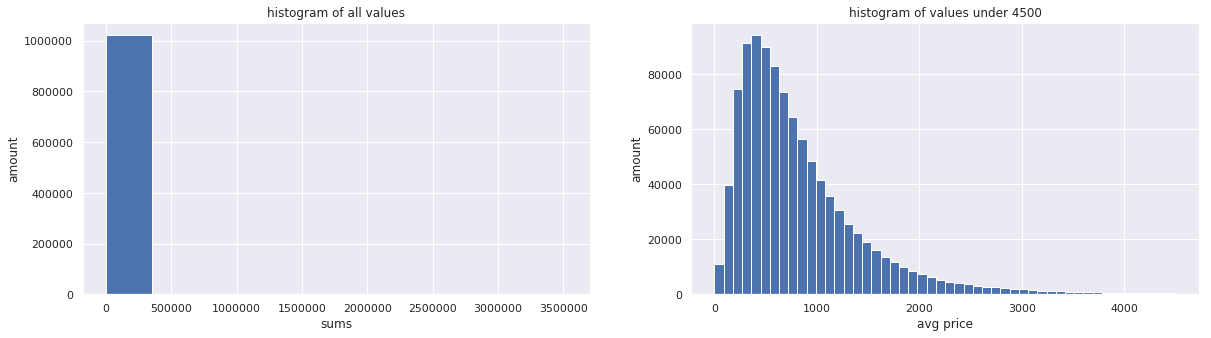

In [11]:
max_value = 4500
colomn_amount = 50

figure, axes_array = plt.subplots(1, 2, figsize=(20, 5))
axes_array[0].set_title("histogram of all values")
axes_array[0].set_xlabel("sums")
axes_array[0].set_ylabel("amount")
axes_array[0].hist(y_train)

axes_array[1].set_title("histogram of values under 4500")
axes_array[1].set_xlabel("avg price")
axes_array[1].set_ylabel("amount")
axes_array[1].hist(y_train, bins=colomn_amount,  range=(0, max_value))

plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: Судя по гистограмме у нас имеются значительные выбросы. Так же если рассмотрим гистограмму после удаления выбросов из выборки, то увидим более адекватно выглядящее распределение. Забегая вперед, можно сказать, что логарифм таргета будет выглядеть, как нормально распределенная величина, значит просто тагрет имеет Логнормальное распределение.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: 
1. Очевидно, что в длине поездки нам важно, какой будет порядок длины поездки а не конкретное ее значение (ведь на это и ориентируется клиент). В данном случае RMSLE подходит гораздо больше!
2. Вероятно, еще здесь играет роль то, что ввиду того, что функциия логарифмиическая, она не симметрична и функция ошибки будет карать нас больше за заниженные прогнозы ( а это, я думаю, важно для компании перевозчика, потому что лучше завысить прогноз по времени и приехать раньше, чем занизить и клиентт куда-то не успеет).

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашим выборкам колонки `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке:

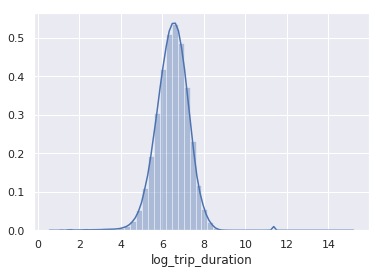

In [12]:
y = data["trip_duration"]

X = data.drop(columns=["trip_duration"])

X['log_trip_duration'] = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

sns.distplot(X_train['log_trip_duration'])

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
const_pred = np.mean(X_train['log_trip_duration'])
value = np.sqrt( np.sum((X_train['log_trip_duration'] - const_pred) ** 2) / len(X_train['log_trip_duration']) )

print("Metrics value at minimum of the function", value)

Metrics value at minimum of the function 0.7963886472231682


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [14]:
data['day_of_year'] = data["pickup_datetime"].dt.dayofyear
print(len(set(data['day_of_year'])))
data["day_of_year"]

182


0           74
1          164
2           19
3           97
4           86
5           30
6          169
7          142
8          148
9           70
10         131
11         136
12          50
13         153
14         148
15         137
16         102
17         105
18         179
19         157
20          59
21          92
22         100
23         177
24         155
25          45
26          58
27         172
28         165
29          83
          ... 
1458614     39
1458615     36
1458616    113
1458617    106
1458618    108
1458619    114
1458620    119
1458621    130
1458622     50
1458623     18
1458624     61
1458625     25
1458626     17
1458627    175
1458628    151
1458629    176
1458630    177
1458631    135
1458632     66
1458633     77
1458634     94
1458635    140
1458636     43
1458637    108
1458638     33
1458639     99
1458640     10
1458641    113
1458642      5
1458643     96
Name: day_of_year, Length: 1458644, dtype: int64

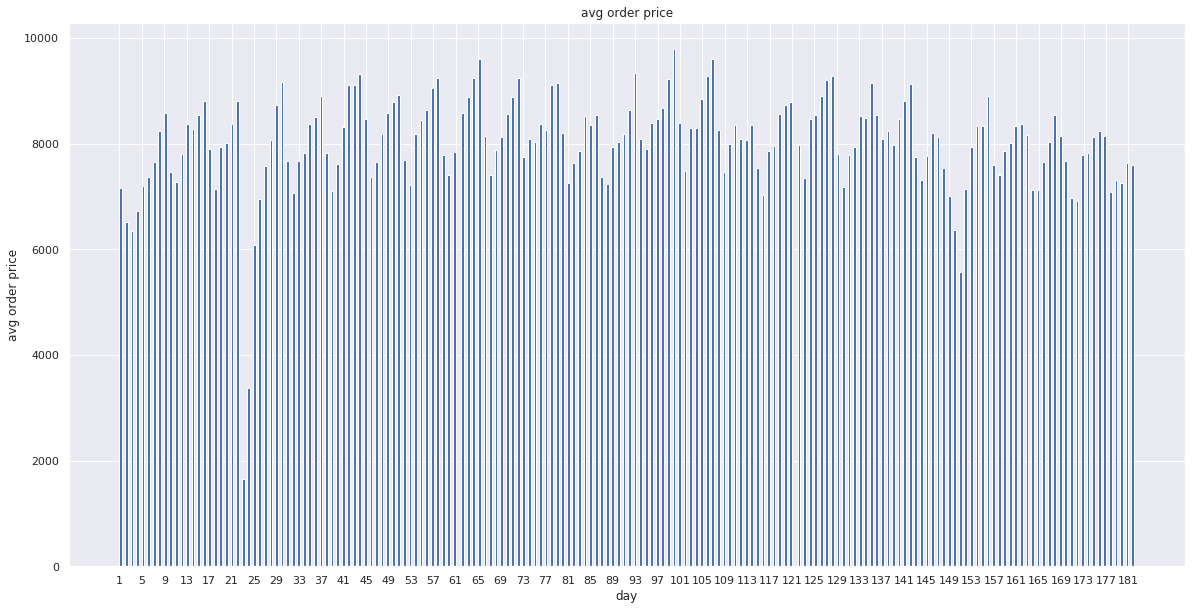

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# sns.set(rc={'figure.figsize':(20,10)})
# sns.figure(figsize=(20, 10))
# ax = sns.countplot(x='day_of_year', data=data)

plt.figure(figsize=(20, 10))
plt.title("avg order price")
plt.xlabel("day")
plt.xticks(range(1, len(set(data['day_of_year'])), 4), list(set(data['day_of_year']))[::4])
plt.ylabel("avg order price")
plt.hist(data['day_of_year'], bins=365)

plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**: ВАШИНГТОН, 23 янв — РИА Новости, Григорий Дубовицкий. Губернатор штата Нью-Йорк Эндрю Куомо запретил автомобильное движение в городе Нью-Йорк из-за снежной бури "Джонас", которая накрыла мегаполис в субботу.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [16]:
data['day_of_week'] = data["pickup_datetime"].dt.dayofweek
sm = [len(data[data['day_of_week'] == 0]),
      len(data[data['day_of_week'] == 1]),
      len(data[data['day_of_week'] == 2]),
      len(data[data['day_of_week'] == 3]),
      len(data[data['day_of_week'] == 4]),
      len(data[data['day_of_week'] == 5]),
      len(data[data['day_of_week'] == 6])
     ]

data['hour'] = data['pickup_datetime'].dt.hour
hour_of_day = []
for i in range(24):
    hour_of_day.append(len(data[data['hour'] == i]))

# sum(hour_of_day)
data['month'] = data['pickup_datetime'].dt.month

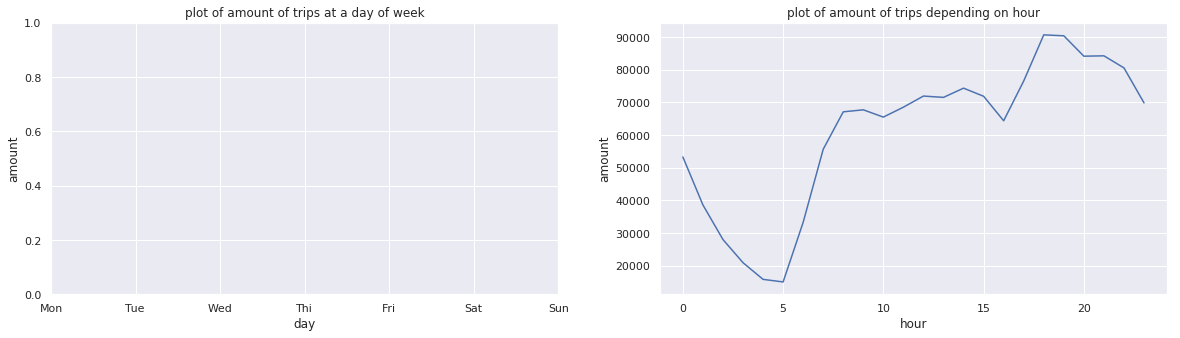

In [17]:
figure, axes_array = plt.subplots(1, 2, figsize=(20, 5))
axes_array[0].set_title("plot of amount of trips at a day of week")
axes_array[0].set_xlabel("day")
axes_array[0].set_ylabel("amount")
axes_array[0].plot
plt.sca(axes_array[0])
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thi', 'Fri', 'Sat', 'Sun'])

axes_array[1].set_title("plot of amount of trips depending on hour")
axes_array[1].set_xlabel("hour")
axes_array[1].set_ylabel("amount")
axes_array[1].plot(hour_of_day)

plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [1]:
data.head()

NameError: name 'data' is not defined

In [28]:
dataframe = pd.DataFrame(data[data.month == 1].hour.value_counts())
for i in range(2, 13):
    df2 = pd.DataFrame(data[data.month == i].hour.value_counts())
    df2.reset_index(inplace = True)
    df2['month'] = i
    dataframe = pd.concat([dataframe, df2])
dataframe

/home/michael/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,hour,index,month
18,14402,NaN,NaN
19,14116,NaN,NaN
20,13250,NaN,NaN
21,12823,NaN,NaN
17,12538,NaN,NaN
22,12232,NaN,NaN
14,11896,NaN,NaN
15,11874,NaN,NaN
12,11272,NaN,NaN
13,11222,NaN,NaN


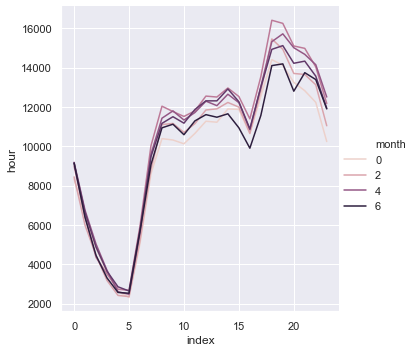

In [17]:
sns.relplot(x='index', y='hour', data = dataframe, hue='month', kind = 'line')

In [18]:
dataframe2 = pd.DataFrame(data[data.day_of_week == 1].hour.value_counts())
dataframe2.reset_index(inplace = True)
dataframe2['day_of_week'] = 1
for i in range(1, 7):
    df2 = pd.DataFrame(data[data.day_of_week == i].hour.value_counts())
    df2.reset_index(inplace = True)
    df2['day_of_week'] = i
    dataframe2 = pd.concat([dataframe2, df2])


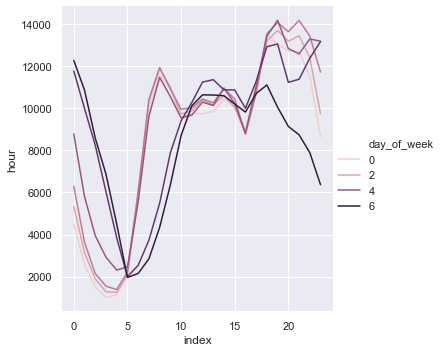

In [19]:
sns.relplot(x='index', y='hour', data = dataframe2, hue='day_of_week', kind = 'line')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**:
1. Заметим, что очевидным образом около 5 утра спрос на такси нереально падает вне зависимости от месяца. Однако к 18-19 часам нереально возрастает.
2. Очевидно, что по субботам и воскресеньям график немного сдвинут вправо - люди позже приезжают домой с дискотек/ужинов/мероприятий и по этой же причине позже встают и едут по другим делам.
3. Так же можно заметить, что в воскресенье вечером спрос на такси тоже падает (люди возвращаются домой раньше, чтобы отдохнуть перед работой и провести воскресный ужин с семьёй)

**Задание 4 (0.5 баллов)**. По *обучающей выборке* нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [20]:
X_train['day_of_week'] = X_train['pickup_datetime'].dt.dayofweek
X_train['hour'] = X_train['pickup_datetime'].dt.hour
X_train['day_of_year'] = X_train['pickup_datetime'].dt.dayofyear

X_train.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,hour,day_of_year
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,7.134891,6,0,87
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,6.878326,4,20,78
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,7.642524,4,18,106
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,6.888572,3,14,84
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,6.177944,3,13,119


In [21]:
mean_log_dayofweek_list = []
for i in range(7):
    mean_log_dayofweek_list.append(X_train[X_train.day_of_week == i].log_trip_duration.mean())

mean_log_dayofyear_list = []
for i in range(max(set(X_train.day_of_year))):
    mean_log_dayofyear_list.append(X_train[X_train.day_of_year == i].log_trip_duration.mean())

mean_log_hour_list = []
for i in range(24):
    mean_log_hour_list.append(X_train[X_train.hour == i].log_trip_duration.mean())


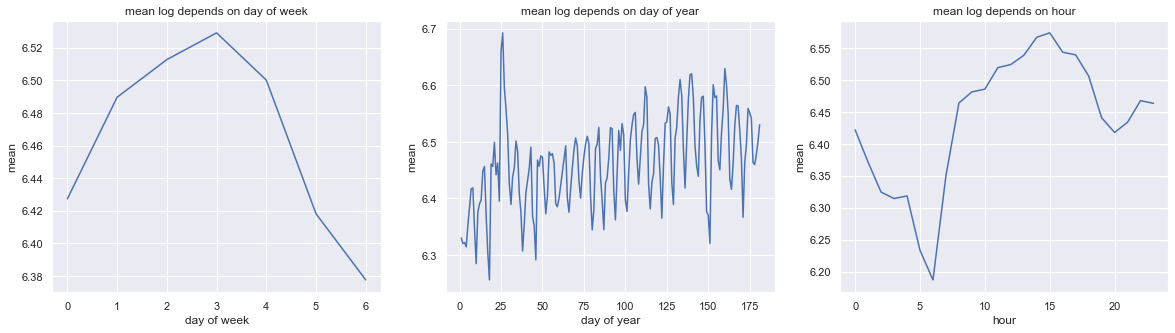

In [22]:
figure, axes_array = plt.subplots(1, 3, figsize=(20, 5))
axes_array[0].set_title("mean log depends on day of week")
axes_array[0].set_xlabel("day of week")
axes_array[0].set_ylabel("mean")
axes_array[0].plot(mean_log_dayofweek_list)

axes_array[1].set_title("mean log depends on day of year")
axes_array[1].set_xlabel("day of year")
axes_array[1].set_ylabel("mean")
axes_array[1].plot(mean_log_dayofyear_list)

axes_array[2].set_title("mean log depends on hour")
axes_array[2].set_xlabel("hour")
axes_array[2].set_ylabel("mean")
axes_array[2].plot(mean_log_hour_list)

plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: 
1. график от дня недели совсем не похож. на графике от часа в сутках есть похожие точки максимума и минимума (но они не одинаковые. Они похожи, так как очевидно, что когда больше заказов, то больше и пробок и следовательно больше длина поездки.
2. В описанные два дня очевидно что средний таргет поднимался, так как машинам было гораздо сложнее (вследствие этого дольше) ездить из-за снега на дорогах
3. Тренд есть - увеличение средней длины поездки с увеличением номера дня в году

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [23]:
X_train['anomally22'] = X_train.apply(lambda x: x['pickup_datetime'].dayofyear == 22, axis=1)
X_train['anomally23'] = X_train.apply(lambda x: x['pickup_datetime'].dayofyear == 23, axis=1)
X_train['month'] = X_train['pickup_datetime'].dt.month

X_train.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,hour,day_of_year,anomally22,anomally23,month
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,7.134891,6,0,87,False,False,3
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,6.878326,4,20,78,False,False,3
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,7.642524,4,18,106,False,False,4
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,6.888572,3,14,84,False,False,3
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,6.177944,3,13,119,False,False,4


In [24]:
X_test['day_of_week'] = X_test['pickup_datetime'].dt.dayofweek
X_test['hour'] = X_test['pickup_datetime'].dt.hour
X_test['day_of_year'] = X_test['pickup_datetime'].dt.dayofyear
X_test['month'] = X_test['pickup_datetime'].dt.month
X_test['anomally22'] = X_test.apply(lambda x: x['pickup_datetime'].dayofyear == 22, axis=1)
X_test['anomally23'] = X_test.apply(lambda x: x['pickup_datetime'].dayofyear == 23, axis=1)

X_test.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,hour,day_of_year,month,anomally22,anomally23
112342,id2631171,2,2016-01-23 00:09:14,1,-74.006615,40.731712,-73.991890,40.727161,N,6.493754,5,0,23,1,False,True
840803,id2892416,1,2016-02-10 19:24:14,3,-73.963203,40.777924,-74.004059,40.747654,N,7.514255,2,19,41,2,False,False
184538,id3095142,2,2016-05-12 06:39:26,1,-73.987595,40.719822,-74.010994,40.716148,N,6.196444,3,6,133,5,False,False
512001,id3803823,2,2016-01-21 08:31:03,1,-73.969055,40.763618,-73.974129,40.778679,N,6.643790,3,8,21,1,False,False
776055,id3155730,2,2016-01-02 13:12:33,2,-73.950165,40.775635,-73.944534,40.779636,N,5.298317,5,13,2,1,False,False


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

y_te_new = X_test['log_trip_duration']
y_tr_new = X_train['log_trip_duration']
x_tr_new = X_train[['hour', 'month', 'day_of_week', 'passenger_count']]
x_te_new = X_test[['hour', 'month', 'day_of_week', 'passenger_count']]

categorical = list(x_tr_new.dtypes.index)
numeric_features = []

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = Ridge()
model.fit(x_tr_new[categorical], y_tr_new)
y_pred = model.predict(x_te_new[categorical])

value = np.sqrt( np.sum((y_te_new - y_pred) ** 2) / len(y_te_new) )
print("Metrics value at minimum of the function", value)

Metrics value at minimum of the function 0.7924130335683222


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [26]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [27]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [28]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [29]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

**Вопрос**: Какие две точки выделяются на карте?
**Ответ**: Аэропорты гуардиа и кеннеди

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [30]:
earth_rad = 6371

def min_dist(df):
    latitude_start = np.radians(df.pickup_latitude.values)
    longitude_start = np.radians(df.pickup_longitude.values)
    latitude_end = np.radians(df.dropoff_latitude.values)
    longitude_end = np.radians(df.dropoff_longitude.values)

    middle_val = np.sin((latitude_end - latitude_start) / 2) ** 2 + np.cos(latitude_start) * np.cos(latitude_end) * np.sin((longitude_end - longitude_start) / 2) ** 2
    sphere_c = 2 * np.arctan2(np.sqrt(middle_val), np.sqrt(1 - middle_val))

    return earth_rad * sphere_c

In [31]:
data['haversine'] = min_dist(data)
X_train['haversine'] = min_dist(X_train)
X_test['haversine'] = min_dist(X_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [32]:
data['log_haversine'] = np.log1p(data['haversine'])
X_train['log_haversine'] = np.log1p(X_train['haversine'])
X_test['log_haversine'] = np.log1p(X_test['haversine'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [33]:
data['log_trip_duration'] = np.log1p(data['trip_duration'])

print("Corellation coef with haversine: %0.4f" % data['haversine'].corr(data['log_trip_duration']))
print("Corellation coef with haversine: %0.4f" % data['log_haversine'].corr(data['log_trip_duration']))

Corellation coef with haversine: 0.5736
Corellation coef with haversine: 0.7499


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


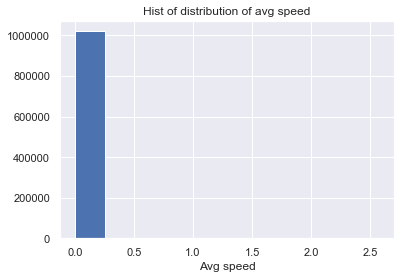

In [34]:
data['avg_speed'] = data['haversine'] / data['trip_duration']
X_train['avg_speed'] = X_train['haversine'] / y_train
X_test['avg_speed'] = X_test['haversine'] / y_test

plt.title("Hist of distribution of avg speed")
plt.xlabel("Avg speed")
plt.hist(X_train['avg_speed'])
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

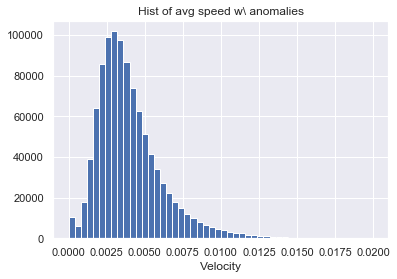

In [35]:
max_value = 0.02

plt.figsize=(20,10)
plt.title("Hist of avg speed w\ anomalies")
plt.xlabel("Velocity")
plt.hist(X_train['haversine'] / y_train, range=(0, max_value), bins=50)
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [36]:
x, y, z = [], [], []
for day, hours in avg_spd_dic.items():
    for hour in hours.keys():
        score = np.median(X_train[X_train['hour'] == hour][X_train['day_of_week'] == day]['avg_speed'])
        x.append(day)
        y.append(hour)
        z.append(score)

NameError: name 'avg_spd_dic' is not defined

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

z = np.array(z)
Z = z.reshape((len(set(x)), len(set(y))))

plt.figure(figsize=(20, 10))
plt.title("Haetmap of median of avg speed")
plt.xlabel("Hour")
plt.ylabel("Day of week")
plt.yticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

ax = plt.gca()

div = make_axes_locatable(ax)
cax = div.append_axes("right", size="5%", pad=0.5)

cbar = plt.colorbar(ax.imshow(Z, cmap='gist_rainbow', aspect='auto'), cax=cax)

Не забудьте удалить колонку со значением скорости из данных!

In [ ]:
data.drop(columns=['avg_speed'], inplace=True)
X_train.drop(columns=['avg_speed'], inplace=True)
X_test.drop(columns=['avg_speed'], inplace=True)

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Очевидно, что в формуле скорости содержится таргет.

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

**Ответ**: 
1. Максимум скорости, что логично по будням 3 - 5 утра
2. Минимум скорости достигается по будням (в разгар рабочего дня) 8 - 16 (однако пробки начинаются около 7 и заканчиваются около 19)

In [ ]:
data['is_traf_heavy'] = (data['day_of_week'] < 5) & (data['hour'] > 7) & (data['hour'] < 19)
X_train['is_traf_heavy'] = (X_train['day_of_week'] < 5) & (X_train['hour'] > 7) & (X_train['hour'] < 19)
X_test['is_traf_heavy'] = (X_test['day_of_week'] < 5) & (X_test['hour'] > 7) & (X_test['hour'] < 19)

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки - аэропорты La Guardia и John F Kennedy. Для каждого из аэропортов добавьте в выборки два признака: началась ли поездка из этого аэропорта и закончилась ли поездка в этом аэропорту.

In [ ]:
grd_lat = 40.776410
grd_lon = -73.873752
ken_lat = 40.642175
ken_lon = -73.780782

In [ ]:
def pnt_in_area(srs_lat, srs_lon, lat2, lon2):
    lat_start = np.radians(srs_lat.values)
    lon_start = np.radians(srs_lon.values)
    lat_end = np.radians([lat2] * len(srs_lat))
    lon_end = np.radians([lon2] * len(srs_lon))

    middle_val = np.sin((lat_end - lat_start) / 2) ** 2 + np.cos(lat_start) * np.cos(lat_end) * np.sin((lon_end - lon_start) / 2) ** 2
    res = 2 * np.arctan2(np.sqrt(middle_val), np.sqrt(1 - middle_val))

    return earth_rad * res < 1

In [ ]:
def strt_end_airports(df):
    df['start_in_grd'] = pnt_in_area(df.pickup_latitude, df.pickup_longitude, grd_lat, grd_lon)
    df['end_in_grd'] = pnt_in_area(df.dropoff_latitude, df.dropoff_longitude, grd_lat, grd_lon)
    df['start_in_ken'] = pnt_in_area(df.pickup_latitude, df.pickup_longitude, ken_lat, ken_lon)
    df['end_in_ken'] = pnt_in_area(df.dropoff_latitude, df.dropoff_longitude, ken_lat, ken_lon)

strt_end_airports(data)
strt_end_airports(X_train)
strt_end_airports(X_test)

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [ ]:
figure, axes_array = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x="start_in_grd", y="log_trip_duration", data=X_train, ax=axes_array[0, 0])
sns.boxplot(x="end_in_grd", y="log_trip_duration", data=X_train, ax=axes_array[0, 1])
sns.boxplot(x="start_in_ken", y="log_trip_duration", data=X_train, ax=axes_array[1, 0])
sns.boxplot(x="end_in_ken", y="log_trip_duration", data=X_train, ax=axes_array[1, 1])
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: конечно, да, так как можно заметить, что при поездке в аэропорт мы тратим в среднем больше времени, соотв теперь будем это иметь ввиду

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, численные признаки отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: Вообще я считаю что оба могут быть полезны по своему: айди компании перезвочика может давать нам информацию, от которой будет зависеть то как водит таксист. Кол-во пассажиров может быть полезным, так как чаще всего, большие компании надо развезти по разным адресам, что очевидно увеличивает время поездки

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [187]:
for feature in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']:
    print('For feature: ' + feature)
    print("Number of unique values:", len(set(X_train[feature])))
    print("Unique values:", set(X_train[feature]), end='\n\n')
    

For feature: vendor_id
Number of unique values: 2
Unique values: {1, 2}

For feature: passenger_count
Number of unique values: 9
Unique values: {0, 1, 2, 3, 4, 5, 6, 7, 8}

For feature: store_and_fwd_flag
Number of unique values: 2
Unique values: {'Y', 'N'}



Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

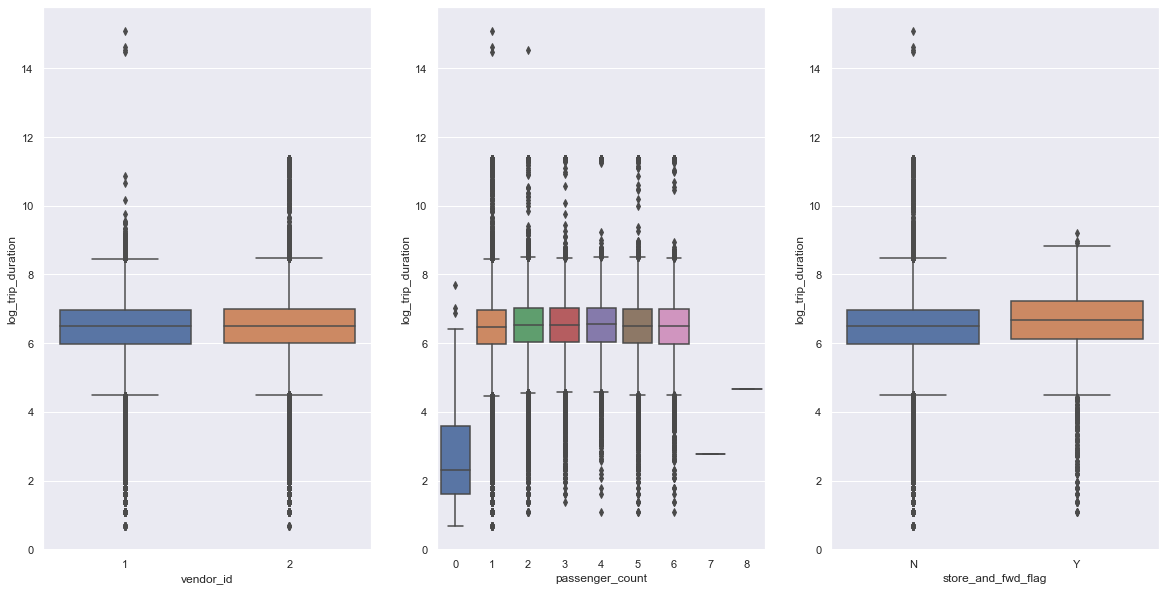

In [192]:
figure, axes_array = plt.subplots(1, 3, figsize=(20, 10))
sns.boxplot(x="vendor_id", y="log_trip_duration", data=X_train, ax=axes_array[0])
sns.boxplot(x="passenger_count", y="log_trip_duration", data=X_train, ax=axes_array[1])
sns.boxplot(x="store_and_fwd_flag", y="log_trip_duration", data=X_train, ax=axes_array[2])
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [195]:
data['vendor_id'] = (data['vendor_id'] == 2).astype('int')
data['store_and_fwd_flag'] = (data['store_and_fwd_flag'] == 'Y').astype('int')

X_train['vendor_id'] = (X_train['vendor_id'] == 2).astype('int')
X_train['store_and_fwd_flag'] = (X_train['store_and_fwd_flag'] == 'Y').astype('int')

X_test['vendor_id'] = (X_test['vendor_id'] == 2).astype('int')
X_test['store_and_fwd_flag'] = (X_test['store_and_fwd_flag'] == 'Y').astype('int')

/anaconda3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/anaconda3/lib/python3.6/site-pa

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: я считаю что исходя из графиков признаки не будут настолько сильными, как например предыдущие.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Стало ли лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальное значение параметра регуляризации (по логарифмической сетке), на тестовой выборке измерьте качество полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими редкими парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ